# Driving Growth: Analyzing E-commerce Sales Data for Strategic Decisions

## About Dataset

This dataset provides a comprehensive collection of information related to user profiles, product details, and user-product interactions. It is a valuable resource for understanding customer behavior, preferences, and purchasing trends on an e-commerce platform.

Data structure:
* User Sheet: This sheet contains user profiles, including details such as user ID, name, age, location, and other relevant information. It helps in understanding the demographics and characteristics of the platform's users.

* Product Sheet: The product sheet offers insights into the various products available on the e-commerce platform. It includes product IDs, names, categories, prices, descriptions, and other product-specific attributes.

* Interactions Sheet: The interactions sheet is a crucial component of the dataset, capturing the interactions between users and products. It records details of user actions, such as product views, purchases, reviews, and ratings. This data is essential for building recommendation systems and understanding user preferences.

In [2]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

col = (np.random.random(), np.random.random(), np.random.random())

In [3]:
#import all csv file
df_customer = pd.read_csv('customer_details.csv')
df_interaction = pd.read_csv('E-commerece sales data 2024.csv')
df_product = pd.read_csv('product_details.csv')

## Data Cleaning

Data cleaning, also known as data cleansing or data scrubbing, is the process of identifying, correcting, or removing errors and inconsistencies in data to improve its quality and ensure its accuracy, completeness, and reliability.

Data cleaning can be accomplished by identifying duplicate rows. Duplication can be accomplished by counting the number of rows and looking at the primary key (Customer ID), which must be the same value.

In [4]:
#function to check duplication
def check_duplicate(x):
    if x.count() ==x.nunique():
        print('Dataset doesnt have duplicate value')
    else:
        print('Dataset have duplicate value')

### Dataset customer

In [5]:
#checking dataset customer duplication
check_duplicate(df_customer['Customer ID'])

Dataset doesnt have duplicate value


To clean the dataset, check for duplication and correct missing data values.

In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Based on the data from the dataset, each column has a value in the non-null count column, which is equal to the number of rows.

In [7]:
df_customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Dataset Interaction

In [8]:
#checking dataset interaction duplication
check_duplicate(df_interaction['user id'])

Dataset doesnt have duplicate value


To clean the dataset, check for duplication and correct missing data values.

In [9]:
df_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2871 non-null   object 
 3   Time stamp        2999 non-null   object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 128.8+ KB


There is a column with the name (Unnamed: 4) that has a non-null value of 0, indicating that the column has no value. To simplify analysis, remove columns with values like this from the dataset.

In [10]:
#clear Unnamed:4 column 
df_interaction = df_interaction.drop(['Unnamed: 4'], axis=1)

The column (Interaction type) contains empty row values, as indicated by the non-null count value, which differs from the total number of dataset rows. To determine what action to take with this column, you can first preview the dataset's structure.

In [11]:
df_interaction.head()

,user id,product id,Interaction type,Time stamp
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00


The structure (Interaction type) provides valuable information about user characteristics. To complete the empty values in this column, add a value (No Interaction) to indicate that the product has no interaction with the user.

In [12]:
#fill null value in Intereaction type column
df_interaction['Interaction type'].fillna('No Interaction', inplace=True)

After cleaning the dataset, check each column again.

In [13]:
df_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  3294 non-null   object 
 3   Time stamp        2999 non-null   object 
dtypes: float64(1), object(3)
memory usage: 103.1+ KB


Adding values to the (Interaction type) column results in more rows than the primary key column (user ID). So the action that can be taken is to verify the value of that row.

In [14]:
#check row 2999 - 3294
df_interaction.iloc[2999:3294]

,user id,product id,Interaction type,Time stamp
2999,NaN,NaN,No Interaction,NaN
3000,NaN,NaN,No Interaction,NaN
3001,NaN,NaN,No Interaction,NaN
3002,NaN,NaN,No Interaction,NaN
3003,NaN,NaN,No Interaction,NaN
...,...,...,...,...
3289,NaN,NaN,No Interaction,NaN
3290,NaN,NaN,No Interaction,NaN
3291,NaN,NaN,No Interaction,NaN
3292,NaN,NaN,No Interaction,NaN


The row can be deleted as all columns have null values except for the Interaction type column.

In [15]:
#select range 0 - 2999 index
df_interaction = df_interaction.iloc[0:2999]

In [16]:
df_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2999 non-null   object 
 3   Time stamp        2999 non-null   object 
dtypes: float64(1), object(3)
memory usage: 93.8+ KB


### Dataset Product

In [17]:
#check primary key
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniqe Id               10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8230 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [18]:
#checking dataset interaction duplication
check_duplicate(df_product['Uniqe Id'])

Dataset doesnt have duplicate value


The information shows that many columns in the dataset have no values, so these columns can be deleted.

In [19]:
#remove column table with null value
df_product = df_product.dropna(axis=1, how='all')

For columns that do not have complete values, first examine their structure; if they are not required in the analysis, delete them.

In [20]:
df_product = df_product.drop(['Upc Ean Code'], axis=1)
df_product = df_product.drop(['Model Number'], axis=1)
df_product = df_product.drop(['Variants'], axis=1)
df_product = df_product.drop(['Product Dimensions'], axis=1)

Add values for products with empty rows in the analysis.

In [21]:
df_product['Category'].fillna('No Category', inplace=True)
df_product['Selling Price'].fillna('$0.00', inplace=True)
df_product['About Product'].fillna('No About Product', inplace=True)
df_product['Product Specification'].fillna('No Specification', inplace=True)
df_product['Technical Details'].fillna('No Details', inplace=True)
df_product['Shipping Weight'].fillna('0', inplace=True)

In [22]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Uniqe Id               10002 non-null  object
 1   Product Name           10002 non-null  object
 2   Category               10002 non-null  object
 3   Selling Price          10002 non-null  object
 4   About Product          10002 non-null  object
 5   Product Specification  10002 non-null  object
 6   Technical Details      10002 non-null  object
 7   Shipping Weight        10002 non-null  object
 8   Image                  10002 non-null  object
 9   Product Url            10002 non-null  object
 10  Is Amazon Seller       10002 non-null  object
dtypes: object(11)
memory usage: 859.7+ KB


After cleaning, the dataset is easier to analyze.

## Analyzing

### Recommendation system

This analysis is carried out to determine the characteristics of users who visit the application during a specific time period.

<Figure size 1000x600 with 0 Axes>

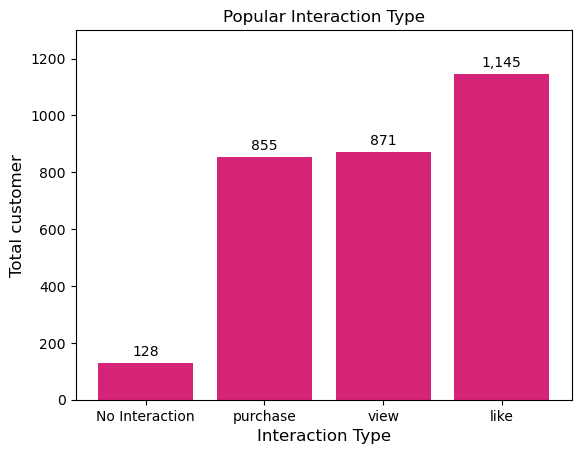

In [23]:
#groupby based on Interaction column for counting user
count_interact = df_interaction.groupby('Interaction type').agg({'user id':'count'}).reset_index().sort_values(by='user id', ascending=True)
count_interact = count_interact.rename(columns={'user id':'count'})

#make plot for interaction type
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
bars = ax.bar(count_interact['Interaction type'], count_interact['count'], color=col)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('Interaction Type', fontsize=12)
ax.set_ylabel('Total customer', fontsize=12)
ax.set_title('Popular Interaction Type', fontsize=12)
plt.ylim(0,1300)

plt.show()

The resulting plot shows the characteristics of users who like products. When a user is likely to make a purchase in the future, they engage in like-based interactions.

The second most common interaction is a view, which is not far removed from the purchase transaction. The sum of these two interactions indicates that the user who makes the purchase requires the product.

Based on this plot, it can be concluded that the purchase was made by a user who truly needed the product at the time and had a strong desire to buy it.

Using a trend plot, we can determine when users are most likely to purchase and when they prefer.

C:\Users\User\AppData\Local\Temp\ipykernel_17856\1510354375.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_interact['like_interact'] = group_interact['Interaction type'].apply(lambda x:1 if x=='like' else 0)
C:\Users\User\AppData\Local\Temp\ipykernel_17856\1510354375.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_interact['view_interact'] = group_interact['Interaction type'].apply(lambda x:1 if x=='view' else 0)


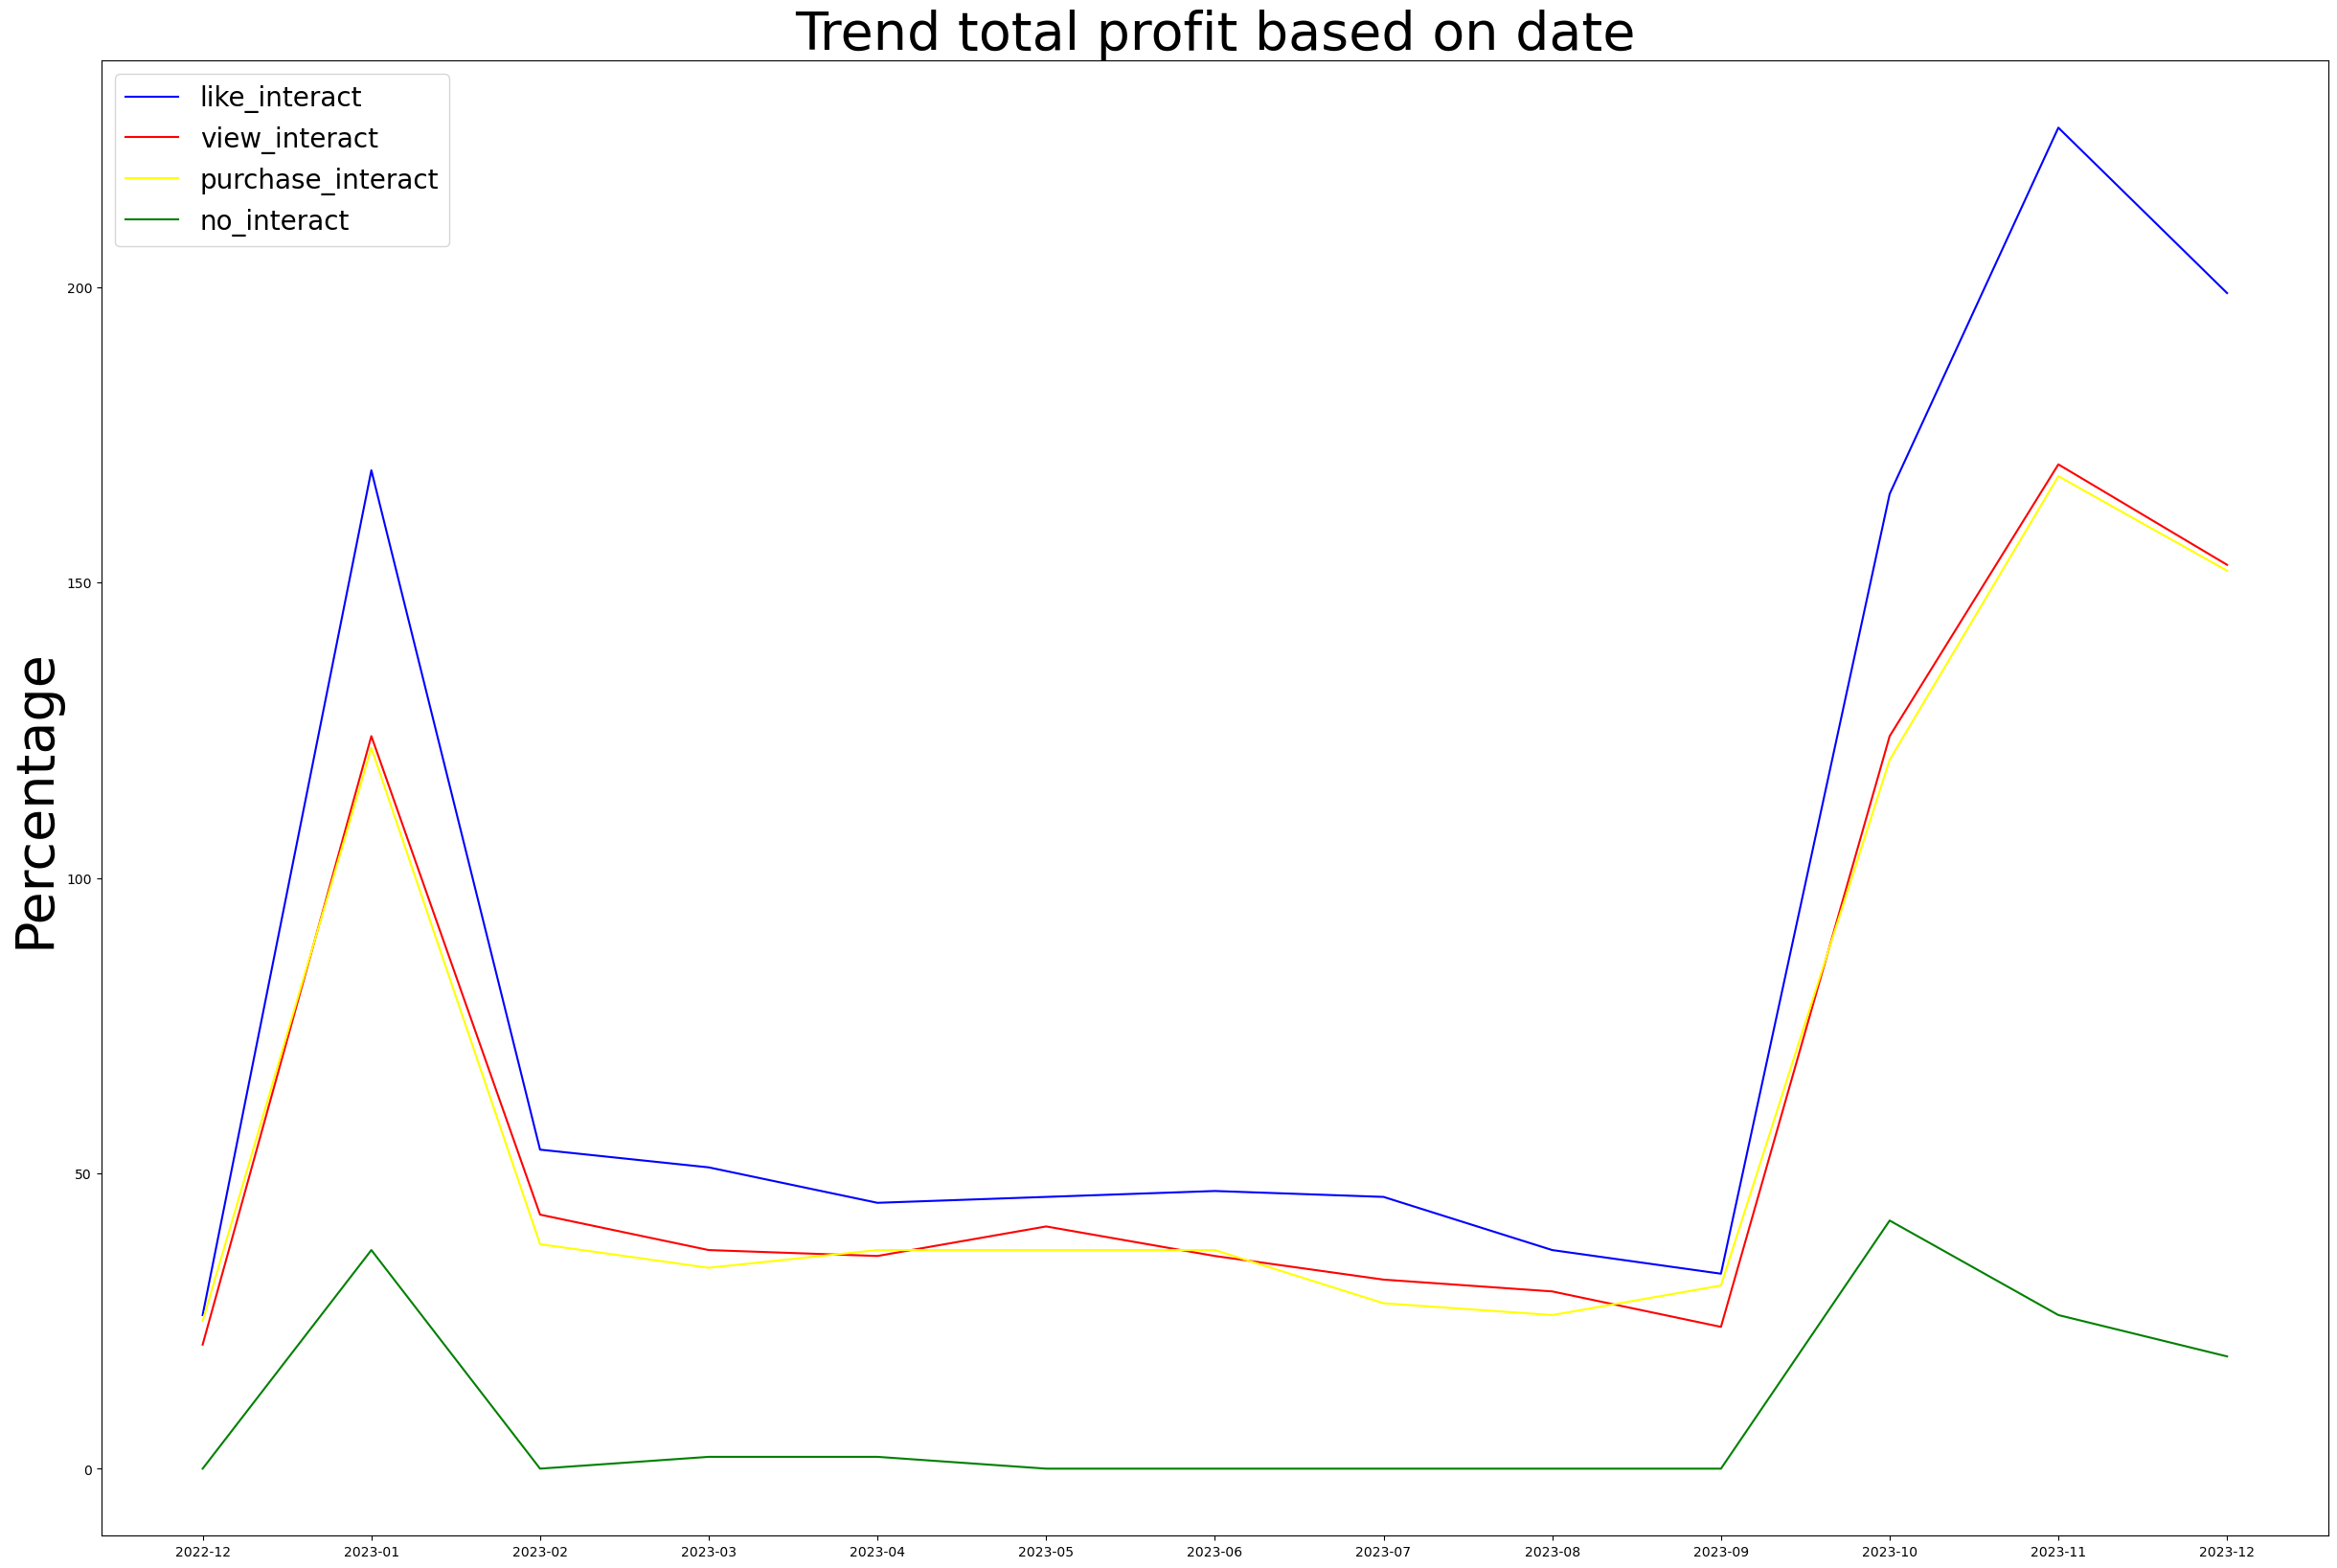

In [59]:
#change data type for Time stamp
df_interaction['Time stamp'] = pd.to_datetime(df_interaction['Time stamp'], format='%d/%m/%Y %H:%M')

#making new column for just mont-year
df_interaction['month'] = df_interaction['Time stamp'].dt.to_period('M').astype(str)

#make duplicate with just Interaction type and month column 
group_interact = df_interaction[['Interaction type', 'month']]

#make new column based on interaction type
group_interact['like_interact'] = group_interact['Interaction type'].apply(lambda x:1 if x=='like' else 0)
group_interact['view_interact'] = group_interact['Interaction type'].apply(lambda x:1 if x=='view' else 0)
group_interact['purchase_interact'] = group_interact['Interaction type'].apply(lambda x:1 if x=='purchase' else 0)
group_interact['no_interact'] = group_interact['Interaction type'].apply(lambda x:1 if x=='No Interaction' else 0)

#group by month column for sum user per period month-year
group_interact = group_interact.groupby('month').agg({'like_interact':'sum', 'view_interact':'sum', 'purchase_interact':'sum', 'no_interact':'sum'}).reset_index()

#ploting
plt.figure(figsize=(30,20))
plt.plot(group_interact['month'], group_interact['like_interact'], color='blue')
plt.plot(group_interact.index, group_interact['view_interact'], color='red')
plt.plot(group_interact.index, group_interact['purchase_interact'], color='yellow')
plt.plot(group_interact.index, group_interact['no_interact'], color='green')
plt.legend(['like_interact', 'view_interact', 'purchase_interact', 'no_interact'], prop={'size':20})

plt.title('Trend total profit based on date', fontsize=40)
plt.ylabel('Percentage', fontsize=40)
ax.tick_params(axis='x', labelsize=60)
ax.tick_params(axis='y', labelsize=30)
ax.yaxis.labelpad = 20

According to the trend plot, the four interaction categories follow the same trend but in different amounts. The trend tends to increase near the end of the year and at the start of the year, possibly due to Christmas and New Year.

To learn more about the factors that cause this, you can join the product dataset, which explains the product's characteristics.

In [30]:
#join dataset interaction and dataset product
join_intprod = df_interaction.join(df_product.set_index('Uniqe Id'), on='product id')

Based on the previous bar plot, the purhcase interaction has a lower value than the other interactions.

The first assumption that can be made to explain why purchase interactions are less frequent than other interactions is based on the product's price.

If you look at the information, the price column contains str. The Selling Price column contains multiple values with different formats, requiring additional cleaning to ensure consistency.

In [31]:
#clear $ to change to float
character_to_remove = "$"

#define a function to remove the character from a single cell
def remove_character(cell_value):
    return cell_value.replace(character_to_remove, "")

#apply the function to every cell in the DataFrame
for column in join_intprod.columns:
    join_intprod['Selling Price'] = join_intprod['Selling Price'].apply(remove_character)


#cleaning for format from like 74.99 - 249.99
join_intprod['Selling Price'] = join_intprod['Selling Price'].str.split(' - ').str[0]

#cleaning for format from 6.94  6 . 94
def clean_string(s):
    import re
    if isinstance(s, str):
        cleaned = re.sub(r'\s+', ' ', s)  #replace multiple spaces with a single space
        cleaned = cleaned.strip()  #remove leading and trailing spaces
        parts = cleaned.split(' ')  #split the string by space
        return parts[0]  #return only the first part
    else:
        return s

#apply the function to the 'value' column
join_intprod['Selling Price'] = join_intprod['Selling Price'].apply(clean_string)

#change format to zero
join_intprod.loc[join_intprod['Selling Price'] == 'Total price:', 'Selling Price'] = '0'

#change format to zero
join_intprod.loc[join_intprod['Selling Price'] == 'Total', 'Selling Price'] = '0'

#change format from 1,179.99
join_intprod['Selling Price'] = join_intprod['Selling Price'].str.replace(',', '')

#change format 
join_intprod.loc[join_intprod['Selling Price'] == '&'] = 0

#change format from str uppercase 
def replace_az(s):
    if isinstance(s, str) and any(c.isupper() for c in s):
        import re
        return re.sub(r'[A-Z]', '0', s)
    return s

#apply the function to the 'text' column
join_intprod['Selling Price'] = join_intprod['Selling Price'].apply(replace_az)

#change format 
join_intprod.loc[join_intprod['Selling Price'] == '0urrently'] = 0

#change format lowercase
def replace_az(s):
    if isinstance(s, str):
        import re
        return re.sub(r'[a-z]', '0', s)
    else:
        return s

#apply the function to the 'text' column
join_intprod['Selling Price'] = join_intprod['Selling Price'].apply(replace_az)

#change data type selling price to float
join_intprod['Selling Price'] = join_intprod['Selling Price'].astype(float)

After cleaning, an analysis is performed based on interactions with the selling price to determine whether products with lower prices are more likely to be purchased.

In [42]:
print('Average price for like interaction is $ {:,.0f}'.format(join_intprod[join_intprod['Interaction type']=='like']['Selling Price'].mean()))

Average price for like interaction is $ 35


In [43]:
print('Average price for view interaction is $ {:,.0f}'.format(join_intprod[join_intprod['Interaction type']=='view']['Selling Price'].mean()))

Average price for view interaction is $ 32


In [44]:
print('Average price for purchase interaction is $ {:,.0f}'.format(join_intprod[join_intprod['Interaction type']=='purchase']['Selling Price'].mean()))

Average price for purchase interaction is $ 31


According to the results of the grouping, users are more likely to buy cheaper products than more expensive ones.

Another consideration is whether the user intends to make a purchase from an Amazon seller.

<Figure size 1000x600 with 0 Axes>

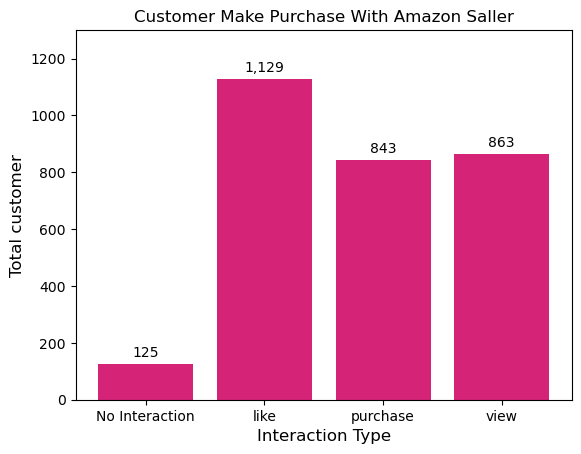

In [60]:
#table for customer interaction from amazon seller
yes_amazon = join_intprod[join_intprod['Is Amazon Seller']=='Y']['Interaction type'].reset_index().groupby('Interaction type').agg({'Interaction type':'count'}).rename(columns={'Interaction type':'count'}).reset_index()

#make plot based interaction type
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
bars = ax.bar(yes_amazon['Interaction type'], yes_amazon['count'], color=col)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('Interaction Type', fontsize=12)
ax.set_ylabel('Total customer', fontsize=12)
ax.set_title('Customer Make Purchase With Amazon Saller', fontsize=12)
plt.ylim(0,1300)

plt.show()

Each interaction category contains more interactions with Amazon sellers.

<Figure size 1000x600 with 0 Axes>

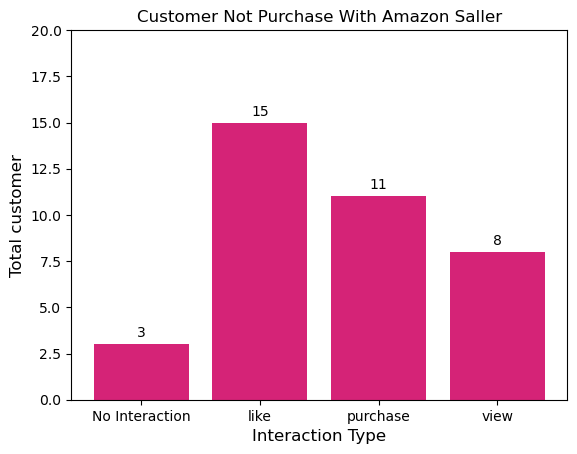

In [61]:
#table for customer interaction from not amazon seller
no_amazon = join_intprod[join_intprod['Is Amazon Seller']=='N']['Interaction type'].reset_index().groupby('Interaction type').agg({'Interaction type':'count'}).rename(columns={'Interaction type':'count'}).reset_index()

#membuat plot berdasarkan Interaction type
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
bars = ax.bar(no_amazon['Interaction type'], no_amazon['count'], color=col)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('Interaction Type', fontsize=12)
ax.set_ylabel('Total customer', fontsize=12)
ax.set_title('Customer Not Purchase With Amazon Saller', fontsize=12)
plt.ylim(0,20)

plt.show()

Amazon sellers have little interaction.

(0.0, 1200.0)

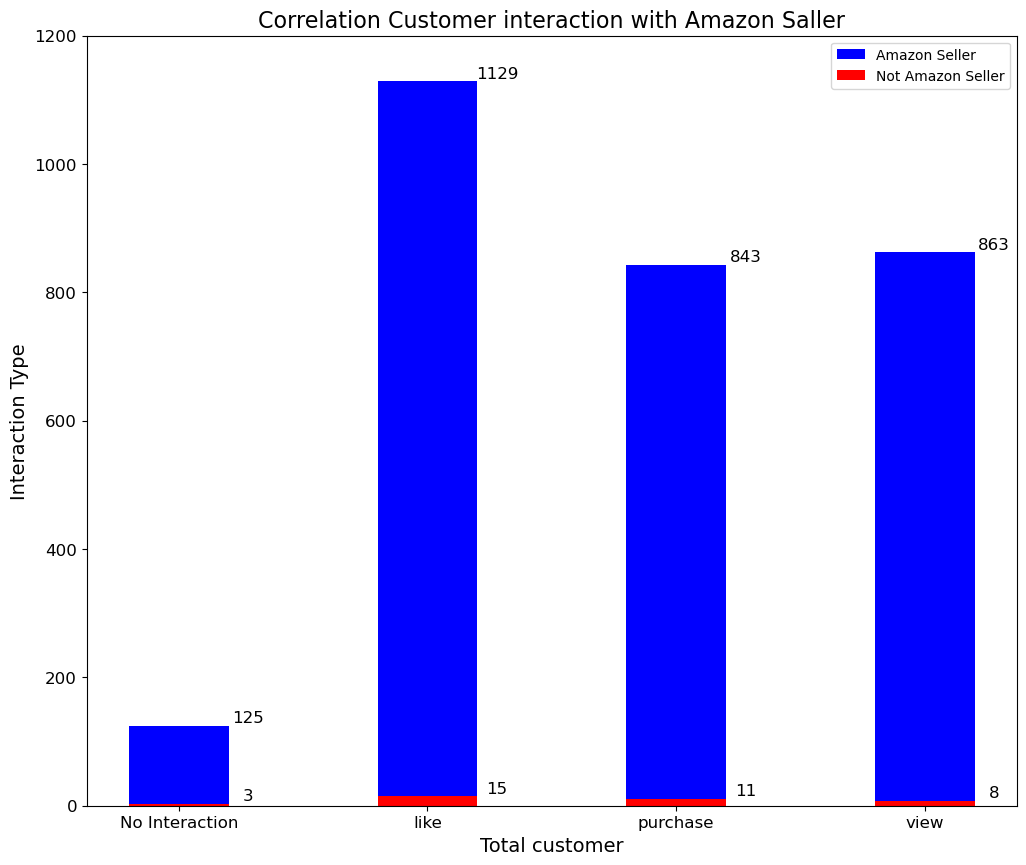

In [62]:
#grouping for yes and no amazon seller
amazon_interact = yes_amazon.rename(columns={'count':'seller_amazon'})
amazon_interact['not_amazon_seller'] = no_amazon['count']

#plot
plt.figure(figsize=(12, 10))

bar1 = plt.bar(amazon_interact['Interaction type'], amazon_interact['seller_amazon'], color='blue', width=0.4)
bar2 = plt.bar(amazon_interact['Interaction type'], amazon_interact['not_amazon_seller'], color='red', width=0.4)

plt.title('Correlation Customer interaction with Amazon Saller', fontsize=16)
plt.xlabel('Total customer', fontsize=14)
plt.ylabel('Interaction Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(['Amazon Seller', 'Not Amazon Seller'])

for bar in bar1:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(50, 0),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

for bar in bar2:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(50, 0),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)
    
plt.ylim(0,1200)

It has been proven that users prefer to buy from Amazon sellers and interact more with sellers who are identified as Amazon sellers.

### Market Basket Analysis

This analysis is performed to determine the most popular products sold in order to develop an inventory strategy.

C:\Users\User\AppData\Local\Temp\ipykernel_17856\3049621717.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = group_age.groupby('age_range')['Age'].sum().reset_index().rename(


(0.0, 2000.0)

<Figure size 1000x600 with 0 Axes>

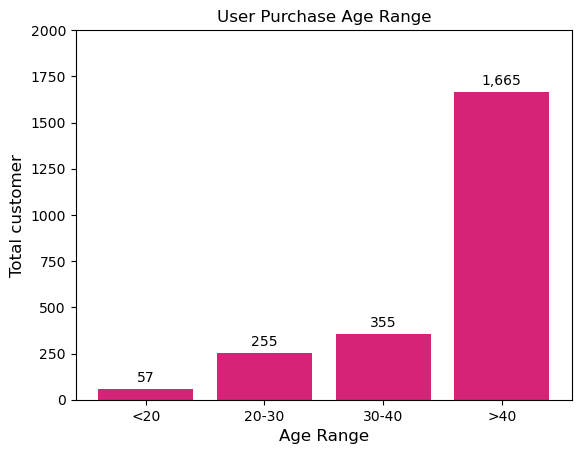

In [63]:
#group by age to count total customer 
group_age = df_customer.groupby('Age').agg({'Customer ID':'count'}).reset_index().rename(
        columns={'Customer ID':'count'}
    )

#put break for grouping age by range age
age_break = [0, 20, 30, 40, 70]
age_label = ['<20', '20-30', '30-40', '>40']
group_age['age_range'] = pd.cut(group_age['Age'], bins=age_break, labels=age_label)

age_group = group_age.groupby('age_range')['Age'].sum().reset_index().rename(
    columns={'Age':'count_age'}
)

#make plot for interaction type
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
bars = ax.bar(age_group['age_range'], age_group['count_age'], color=col)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Total customer', fontsize=12)
ax.set_title('User Purchase Age Range', fontsize=12)
plt.ylim(0,2000)

The total number of customers who make purchases tends to be older than 40.

C:\Users\User\AppData\Local\Temp\ipykernel_17856\3443036221.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_group = group_gender.groupby(['Gender', 'age_range'])['count'].sum().reset_index()


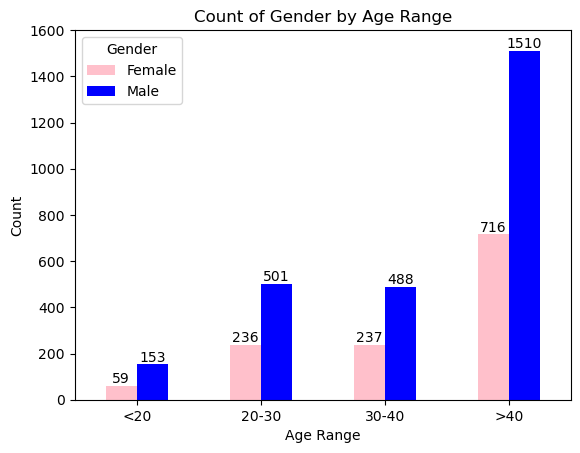

In [64]:
#make new column gender for group_age from df_customer
group_age['Gender'] = df_customer['Gender']
group_gender = df_customer.groupby(['Age', 'Gender']).agg({'Age':'count'}).rename(columns={'Age':'count'}).reset_index()

#make a group age range
age_break = [0, 20, 30, 40, 70]
age_label = ['<20', '20-30', '30-40', '>40']
group_gender['age_range'] = pd.cut(group_gender['Age'], bins=age_break, labels=age_label)

#sum customer gender by age range
gender_group = group_gender.groupby(['Gender', 'age_range'])['count'].sum().reset_index()

#make pivot table and plot
pivot_df = gender_group.pivot(index='age_range', columns='Gender', values='count')
ax = pivot_df.plot(kind='bar', rot=0, color=['pink', 'blue'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Count of Gender by Age Range')
plt.ylim(0,1600)

plt.show()

Customers who make purchases tend to be men.